**ANALYSIS OF SUPPLYCHAIN DATASET OF  DataCo Company**


Problem Statement:To Predict Late shipment risk using Machine Learning

In [51]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,recall_score,f1_score,precision_score,accuracy_score


In [52]:
data = pd.read_csv('/content/DataCoSupplyChainDataset.csv',encoding='latin-1')
pd.set_option('display.max_columns',None)
data.head(5)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [53]:
data.shape

(180519, 53)

INSIGHTS:DATASET CONSISTS OF 35678 ROWS AND 53 COLUMNS

Dropping unnescessary columns

In [54]:
data.drop(['Customer Email', 'Customer Fname','Customer Lname','Customer Password','Product Image'],axis=1,inplace=True)

## **EXPLORATORY DATA ANALYSIS**

### **Univariate analysis**

**BAR GRAPH OF DIFFERENT METHODS FOR SHIPPING**

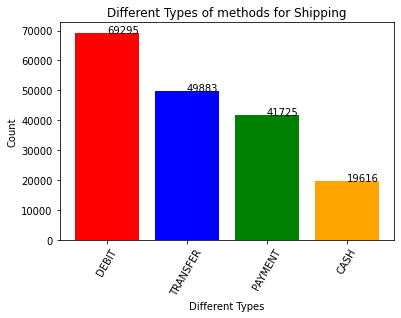

In [55]:


df1=data['Type'].value_counts().to_frame().reset_index()
plt.bar(df1['index'],df1['Type'],color = ['red','blue','green','orange'])
plt.title('Different Types of methods for Shipping')
plt.xlabel('Different Types')
plt.ylabel('Count')
plt.xticks(rotation=60)
for i,j in zip(df1['index'],round(df1['Type'],2)):
 plt.annotate(str(j),(i,j+2))

**BAR GARAPH OF VARIOUS SHIPPING MODES**

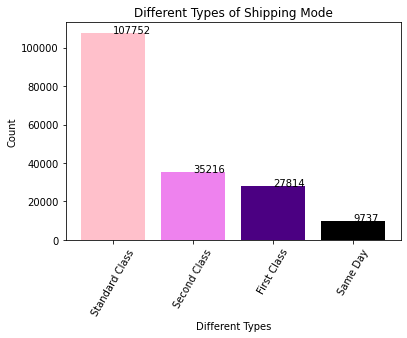

In [56]:


df1=data['Shipping Mode'].value_counts().to_frame().reset_index()
plt.bar(df1['index'],df1['Shipping Mode'],color = ['pink','violet','indigo','black'])
plt.title('Different Types of Shipping Mode')
plt.xlabel('Different Types')
plt.ylabel('Count')
plt.xticks(rotation=60)
for i,j in zip(df1['index'],round(df1['Shipping Mode'],2)):
 plt.annotate(str(j),(i,j+2))

INSIGHTS:Most orders prefer standard class shipping mode

**Frequency graph**

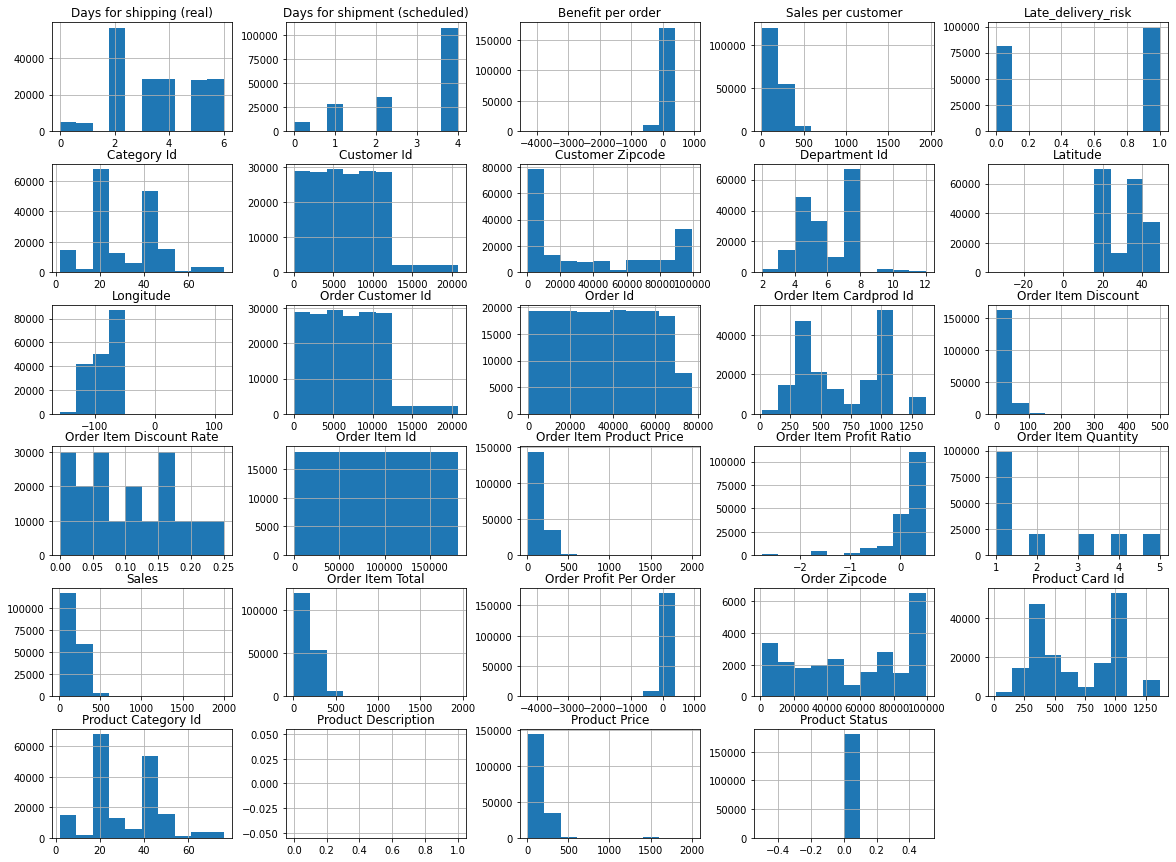

In [57]:


freqgraph= data.select_dtypes(include=['float','int'])
freqgraph.hist(figsize=(20,15))
plt.show()

###**Bivariate analysis**

**Scatter plot of product price and order profit per order**

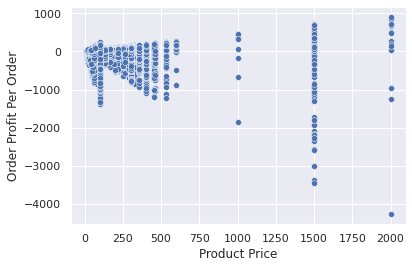

In [58]:
sns.set()
sns.scatterplot(data=data, x="Product Price", y="Order Profit Per Order")

# **Pre-processing**




**Missing value detection and handling**

In [59]:
data.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Id                           0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0
Order City                            0
Order Country                         0
Order Customer Id                     0
order date (DateOrders)               0


Dropping missing value rows of Customer Lname and Customer Zipcode

In [60]:
data.drop(data.index[data[data['Customer Zipcode'].isnull()].index.tolist()],axis=0,inplace=True)

dropping missing value columns

In [61]:
data.drop(['Order Zipcode','Product Description'],axis = 1,inplace=True)

In [62]:
data.head(3)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,1360,73,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,19491,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,1360,73,Smart watch,327.75,0,1/17/2018 12:06,Standard Class


**Feature Selection**

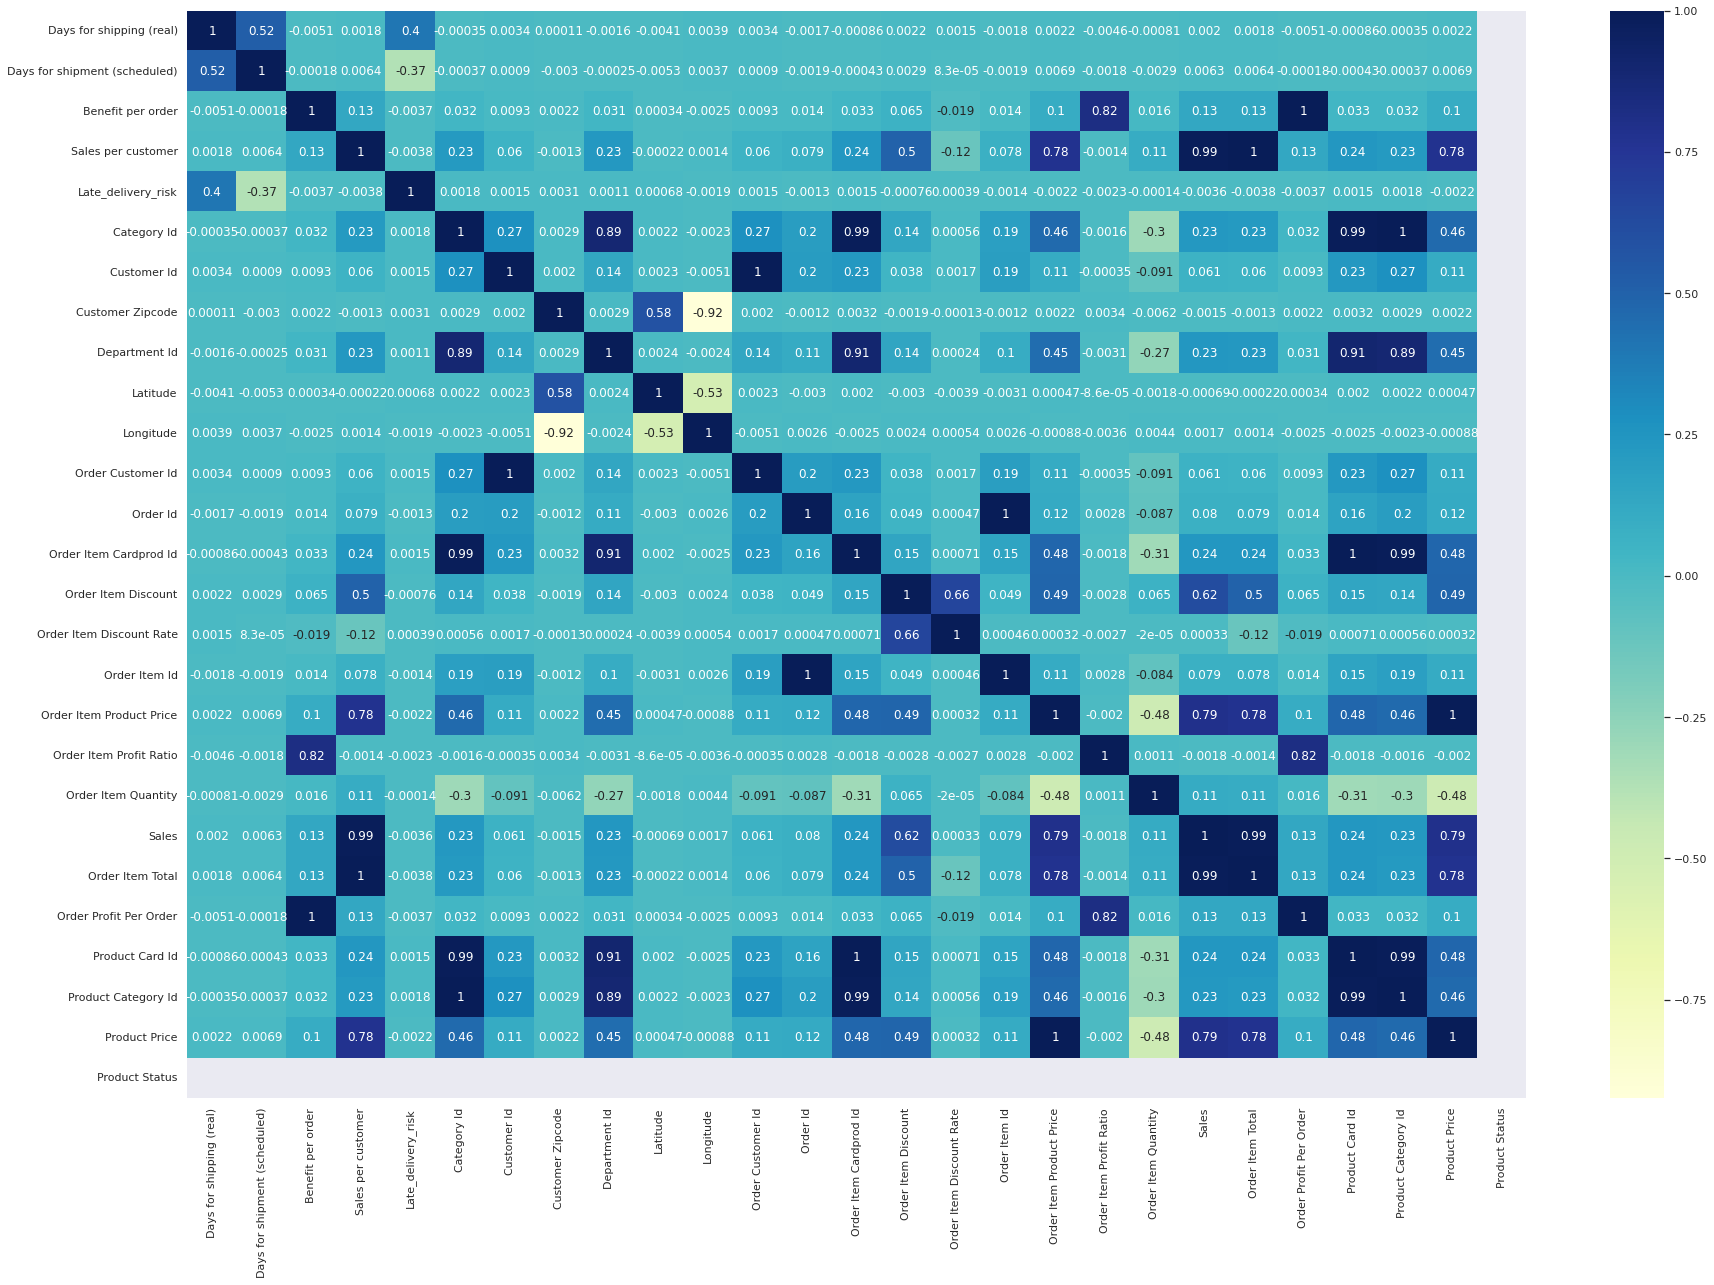

In [63]:
plt.figure(figsize=(30,20))
sns.heatmap(data.corr(),annot=True,cmap="YlGnBu")

We can drop coloumns with high correlation


In [64]:
data.drop(columns=['Customer Id','Benefit per order','Order Item Total','Product Category Id',
         'Order Customer Id', 'Order Item Cardprod Id', 'Product Card Id','Sales'],axis=1,inplace=True)
data.head(3)

,Type,Days for shipping (real),Days for shipment (scheduled),Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,order date (DateOrders),Order Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Order Profit Per Order,Order Region,Order State,Order Status,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,1/31/2018 22:56,77202,13.110000,0.04,180517,327.75,0.29,1,91.250000,Southeast Asia,Java Occidental,COMPLETE,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,1/13/2018 12:27,75939,16.389999,0.05,179254,327.75,-0.80,1,-249.089996,South Asia,Rajastán,PENDING,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,1/13/2018 12:06,75938,18.030001,0.06,179253,327.75,-0.80,1,-247.779999,South Asia,Rajastán,CLOSED,Smart watch,327.75,0,1/17/2018 12:06,Standard Class


**Feature Engineering**

We can covert the date and time into datetime datatype.

In [65]:
data['order_date'] = pd.to_datetime(data['order date (DateOrders)'])
data['shipping_date']=pd.to_datetime(data['shipping date (DateOrders)'])

In [66]:
data['order_year'] = pd.DatetimeIndex(data['order_date']).year
data['order_month'] = pd.DatetimeIndex(data['order_date']).month
data['order_day'] = pd.DatetimeIndex(data['order_date']).day
data['shipping_year'] = pd.DatetimeIndex(data['shipping_date']).year
data['shipping_month'] = pd.DatetimeIndex(data['shipping_date']).month
data['shipping_day'] = pd.DatetimeIndex(data['shipping_date']).day



**Feature Extraction**

In [67]:
model_data = data[['Type','Days for shipping (real)','Days for shipment (scheduled)','Late_delivery_risk',
                'Sales per customer','Latitude','Longitude','Shipping Mode','Order Status',
                'Order Region','Order Country','Order City','Market','Delivery Status','order_day','order_month',
                'order_year','shipping_day','shipping_month']]
model_data.head(5)               

,Type,Days for shipping (real),Days for shipment (scheduled),Late_delivery_risk,Sales per customer,Latitude,Longitude,Shipping Mode,Order Status,Order Region,Order Country,Order City,Market,Delivery Status,order_day,order_month,order_year,shipping_day,shipping_month
0,DEBIT,3,4,0,314.640015,18.251453,-66.037056,Standard Class,COMPLETE,Southeast Asia,Indonesia,Bekasi,Pacific Asia,Advance shipping,31,1,2018,3,2
1,TRANSFER,5,4,1,311.359985,18.279451,-66.037064,Standard Class,PENDING,South Asia,India,Bikaner,Pacific Asia,Late delivery,13,1,2018,18,1
2,CASH,4,4,0,309.720001,37.292233,-121.881279,Standard Class,CLOSED,South Asia,India,Bikaner,Pacific Asia,Shipping on time,13,1,2018,17,1
3,DEBIT,3,4,0,304.809998,34.125946,-118.291016,Standard Class,COMPLETE,Oceania,Australia,Townsville,Pacific Asia,Advance shipping,13,1,2018,16,1
4,PAYMENT,2,4,0,298.250000,18.253769,-66.037048,Standard Class,PENDING_PAYMENT,Oceania,Australia,Townsville,Pacific Asia,Advance shipping,13,1,2018,15,1


**Encoding**

 Encoding the Categorical features using One Hot Encoding

In [68]:
label_encoder = preprocessing.LabelEncoder()

for i in model_data.columns:
    if model_data[i].dtype == 'O':
        model_data[i] = label_encoder.fit_transform(model_data[i])

model_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Type,Days for shipping (real),Days for shipment (scheduled),Late_delivery_risk,Sales per customer,Latitude,Longitude,Shipping Mode,Order Status,Order Region,Order Country,Order City,Market,Delivery Status,order_day,order_month,order_year,shipping_day,shipping_month
0,1,3,4,0,314.640015,18.251453,-66.037056,3,2,15,70,331,3,0,31,1,2018,3,2
1,3,5,4,1,311.359985,18.279451,-66.037064,3,5,13,69,391,3,1,13,1,2018,18,1
2,0,4,4,0,309.720001,37.292233,-121.881279,3,1,13,69,391,3,3,13,1,2018,17,1
3,1,3,4,0,304.809998,34.125946,-118.291016,3,2,11,8,3226,3,0,13,1,2018,16,1
4,2,2,4,0,298.250000,18.253769,-66.037048,3,6,11,8,3226,3,0,13,1,2018,15,1


**Standardization**

We are using Standard scaler technique for standardisation

In [69]:
x = model_data.drop('Late_delivery_risk',axis=1)
y = model_data['Late_delivery_risk']

x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y,test_size=0.20)

sc = preprocessing.StandardScaler()
x_train = sc.fit_transform(x_train)
x_test  = sc.fit_transform(x_test)

## **Machine Learning Modeling**

**Logistic Regression**

In [70]:
log_reg = LogisticRegression().fit(x_train,y_train)
pred = log_reg.predict(x_test)

print('accuracy is: ',round(accuracy_score(y_test,pred),4))
print('Precision is: ',round(precision_score(y_test,pred,average='micro'),4))
print('recall score is: ',round(recall_score(y_test,pred,average='micro'),4))
print('f1 score is: ',round(f1_score(y_test,pred,average='micro'),4))

accuracy is:  0.9956
Precision is:  0.9956
recall score is:  0.9956
f1 score is:  0.9956


**Decision Tree Classifier**

In [71]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
pred  = dt_model.predict(x_test)

print('accuracy is: ',round(accuracy_score(y_test,pred),4))
print('Precision is: ',round(precision_score(y_test,pred,average='micro'),4))
print('recall score is: ',round(recall_score(y_test,pred,average='micro'),4))
print('f1 score is: ',round(f1_score(y_test,pred,average='micro'),4))

accuracy is:  1.0
Precision is:  1.0
recall score is:  1.0
f1 score is:  1.0


**Random Forest Classifier**

In [72]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
pred = rf.predict(x_test)

print('accuracy is: ',accuracy_score(y_test,pred))
print('Precision is: ',precision_score(y_test,pred,average='micro'))
print('recall score is: ',recall_score(y_test,pred,average='micro'))
print('f1 score is: ',f1_score(y_test,pred,average='micro'))

accuracy is:  1.0
Precision is:  1.0
recall score is:  1.0
f1 score is:  1.0


Both RF classifier and Decision Tree classifier have High accuracy. So we can choose either of the two for predicting Late shipping risk.